# Run ArchR

Run dimensionality reduction and downstream analyses.

In [16]:
library(ArchR)
library(patchwork)

In [2]:
set.seed(1)
addArchRThreads(threads = 32) 

Setting default number of Parallel threads to 32.



In [3]:
addArchRGenome("hg38")

Setting default genome to Hg38.



In [4]:
ArrowFiles = c('D0.arrow',
               'D2.arrow',
               'D4.arrow',
               'D6.arrow',
               'D8.arrow',
               'D10.arrow',
               'D12.arrow',
               'D14.arrow')
#              'H1.arrow')

In [ ]:
proj <- ArchRProject(
  ArrowFiles = paste("/srv/scratch/surag/scATAC-reprog/arrow/", ArrowFiles, sep=''), 
  outputDirectory = "/srv/scratch/surag/scATAC-reprog/arrow/without_iPSC",
  copyArrows = FALSE #This is recommened so that you maintain an unaltered copy for later usage.
)

In [68]:
getAvailableMatrices(proj)

[1] "GeneScoreMatrix" "TileMatrix"

In [ ]:
proj <- addIterativeLSI(ArchRProj = proj, iterations = 4, force=T, useMatrix = "TileMatrix", name = "IterativeLSI")

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-b4677b88e92d-Date-2020-04-24_Time-21-33-19.log
If there is an issue, please report to github with logFile!

2020-04-24 21:33:21 : Computing Total Accessibility Across All Features, 0.012 mins elapsed.

2020-04-24 21:33:24 : Computing Top Features, 0.069 mins elapsed.

###########
2020-04-24 21:33:25 : Running LSI (1 of 4) on Top Features, 0.078 mins elapsed.
###########

2020-04-24 21:33:25 : Sampling Cells (N = 10005) for Estimated LSI, 0.079 mins elapsed.

2020-04-24 21:33:25 : Creating Sampled Partial Matrix, 0.079 mins elapsed.

2020-04-24 21:33:38 : Computing Estimated LSI (projectAll = FALSE), 0.3 mins elapsed.

2020-04-24 21:34:58 : Identifying Clusters, 1.636 mins elapsed.

2020-04-24 21:35:26 : Identified 3 Clusters, 2.096 mins elapsed.

2020-04-24 21:35:26 : Saving LSI Iteration, 2.096 mins elapsed.

ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools:

In [14]:
proj <- addClusters(input = proj, reducedDims = "IterativeLSI")

ArchR logging to : ArchRLogs/ArchR-addClusters-b4673ca1fe6d-Date-2020-04-24_Time-21-06-56.log
If there is an issue, please report to github with logFile!

2020-04-24 21:06:57 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.005 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 76727
Number of edges: 2682491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8630
Number of communities: 40
Elapsed time: 27 seconds


25 singletons identified. 15 final clusters.

2020-04-24 21:11:41 : Testing Outlier Clusters, 4.745 mins elapsed.

2020-04-24 21:11:41 : Assigning Cluster Names to 15 Clusters, 4.746 mins elapsed.

2020-04-24 21:11:41 : Finished addClusters, 4.749 mins elapsed.



In [56]:
proj <- addUMAP(ArchRProj = proj, reducedDims = "IterativeLSI", force=T)

22:37:54 UMAP embedding parameters a = 0.7669 b = 1.223

22:37:54 Read 76727 rows and found 30 numeric columns

22:37:54 Using Annoy for neighbor search, n_neighbors = 40

22:37:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

22:38:09 Writing NN index file to temp file /tmp/RtmpgTscAs/fileb4677daf0ba9

22:38:09 Searching Annoy index using 28 threads, search_k = 4000

22:38:11 Annoy recall = 100%

22:38:12 Commencing smooth kNN distance calibration using 28 threads

22:38:16 Initializing from normalized Laplacian + noise

22:38:23 Commencing optimization for 200 epochs, with 4992744 positive edges

22:39:18 Optimization finished



In [57]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b4671cb5671b-Date-2020-04-24_Time-22-39-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools::install_github('VPetukhov/ggrastr')



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b4671cb5671b-Date-2020-04-24_Time-22-39-25.log



In [58]:
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b4674b521275-Date-2020-04-24_Time-22-39-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
ggrastr is not available for rastr of points, continuing without rastr!

To install ggrastr try : devtools::install_github('VPetukhov/ggrastr')



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b4674b521275-Date-2020-04-24_Time-22-39-26.log



Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `color` instead.”
Warning message:
“Use of `dfMean$color` is discouraged. Use `col

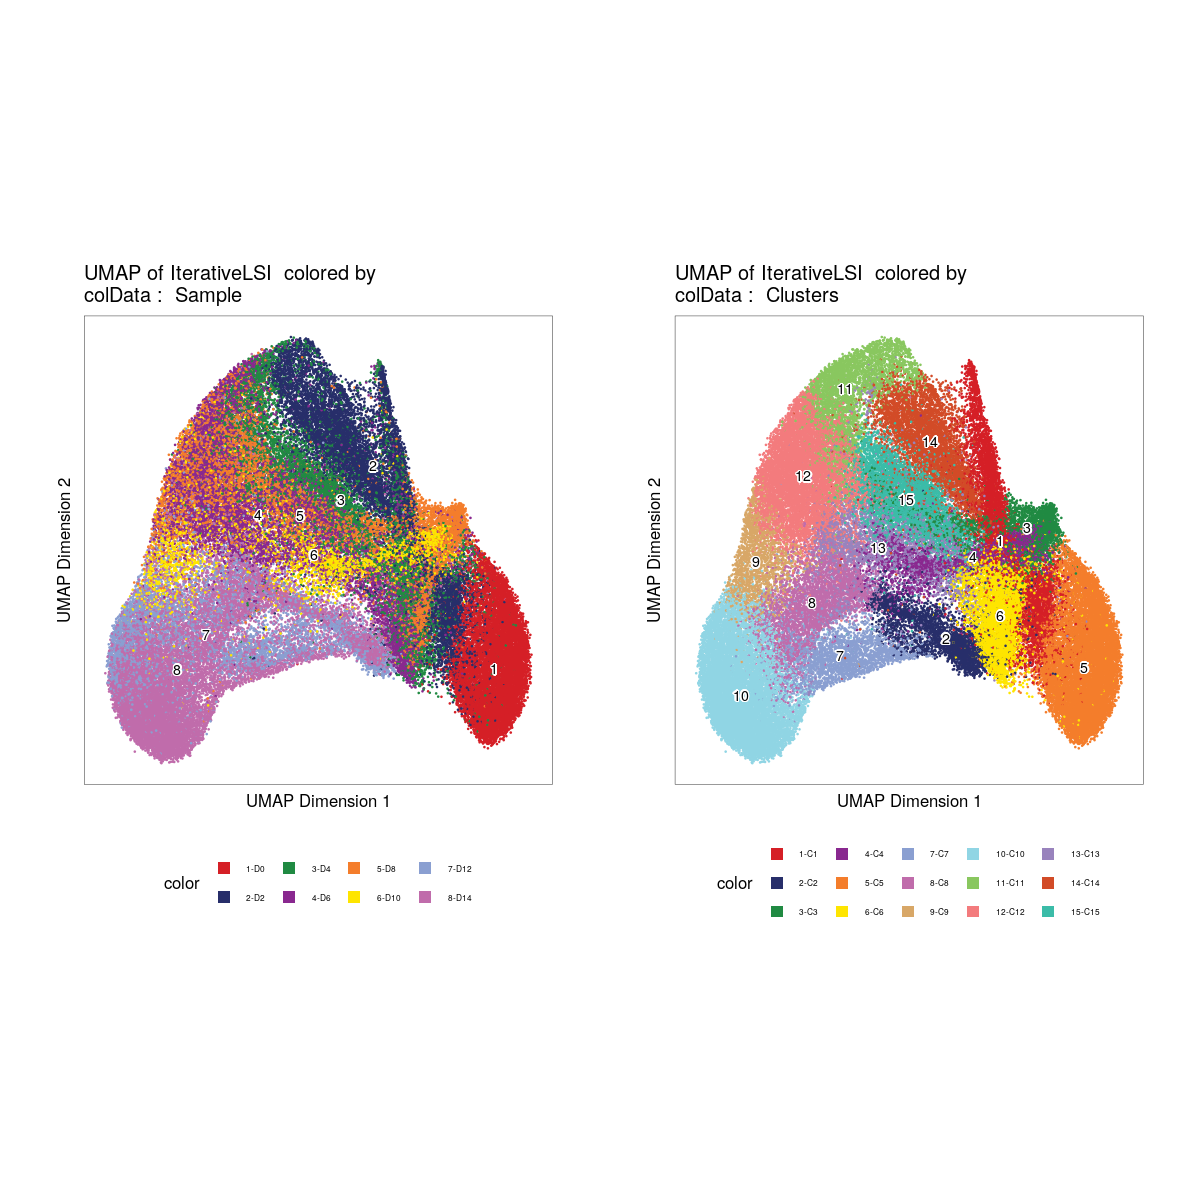

In [59]:
options(repr.plot.width = 10, repr.plot.height = 10)

p1 | p2

In [31]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-b4675d05d05c-Date-2020-04-24_Time-21-17-28.log
If there is an issue, please report to github with logFile!

2020-04-24 21:17:29 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [49]:
markerGenes  <- c(
    "BCL2A1"
  )

p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b4675921aff5-Date-2020-04-24_Time-21-25-10.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-04-24 21:25:11 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b4675921aff5-Date-2020-04-24_Time-21-25-10.log



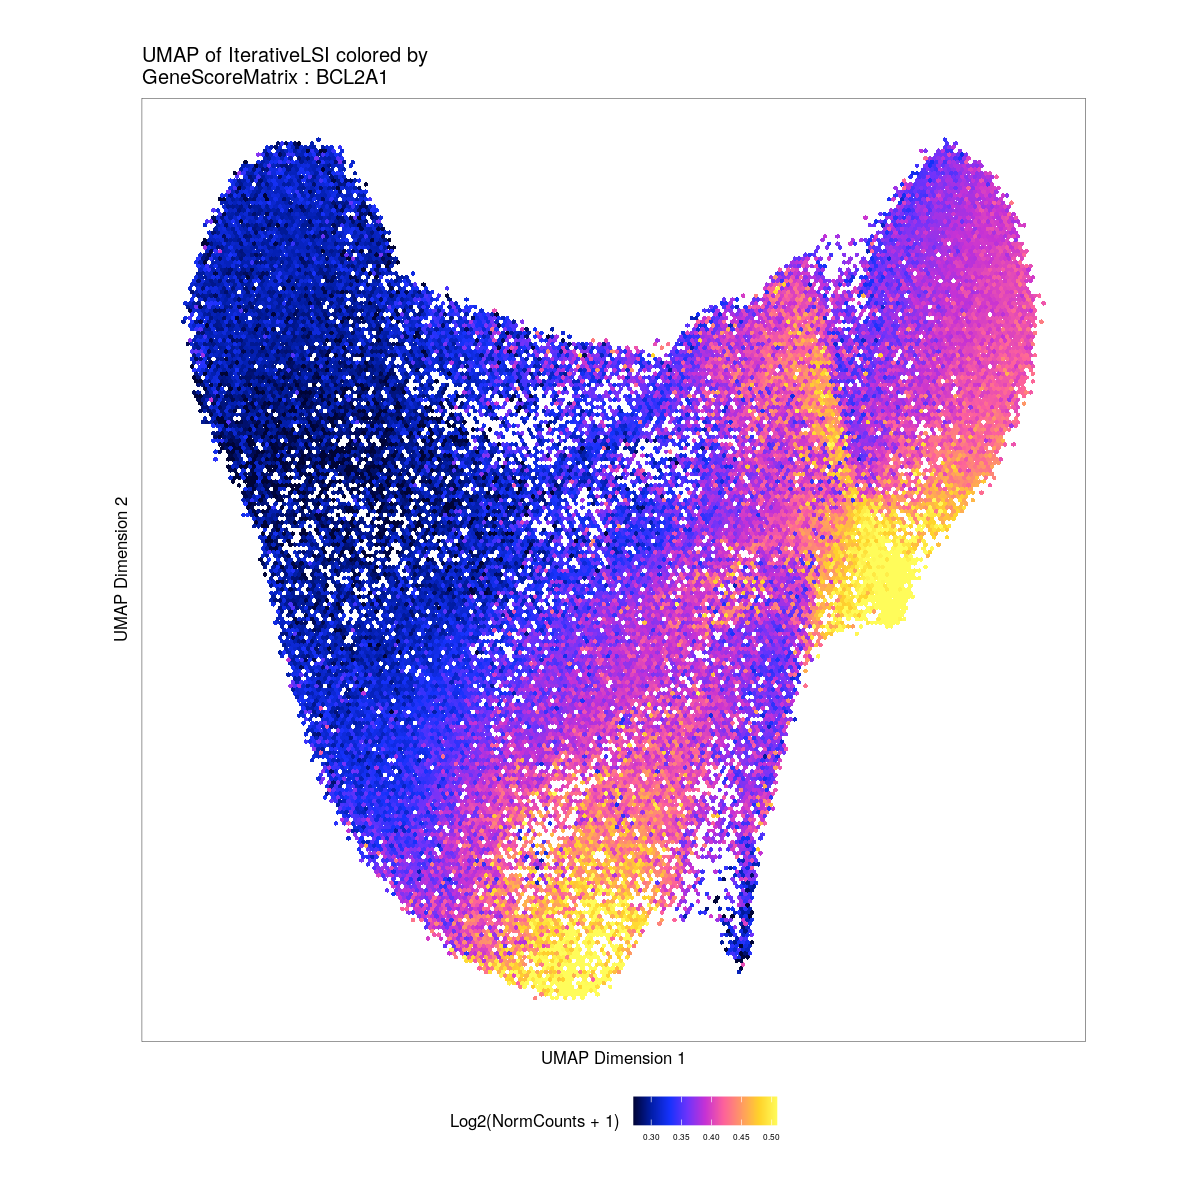

In [50]:
p

In [51]:
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "Clusters", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-b4675d4a2437-Date-2020-04-24_Time-21-25-23.log
If there is an issue, please report to github with logFile!

2020-04-24 21:25:23 : Validating Region, 0.007 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |     gene_id      symbol
         <Rle>         <IRanges>  <Rle> | <character> <character>
  [1]    chr15 79960889-79971446      - |         597      BCL2A1
  -------
  seqinfo: 24 sequences from hg38 genome


2020-04-24 21:25:23 : Adding Bulk Tracks (1 of 1), 0.009 mins elapsed.

2020-04-24 21:25:26 : Adding Gene Tracks (1 of 1), 0.051 mins elapsed.

2020-04-24 21:25:26 : Plotting, 0.056 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-b4675d4a2437-Date-2020-04-24_Time-21-25-23.log



In [ ]:
chr15:79970195-79972196

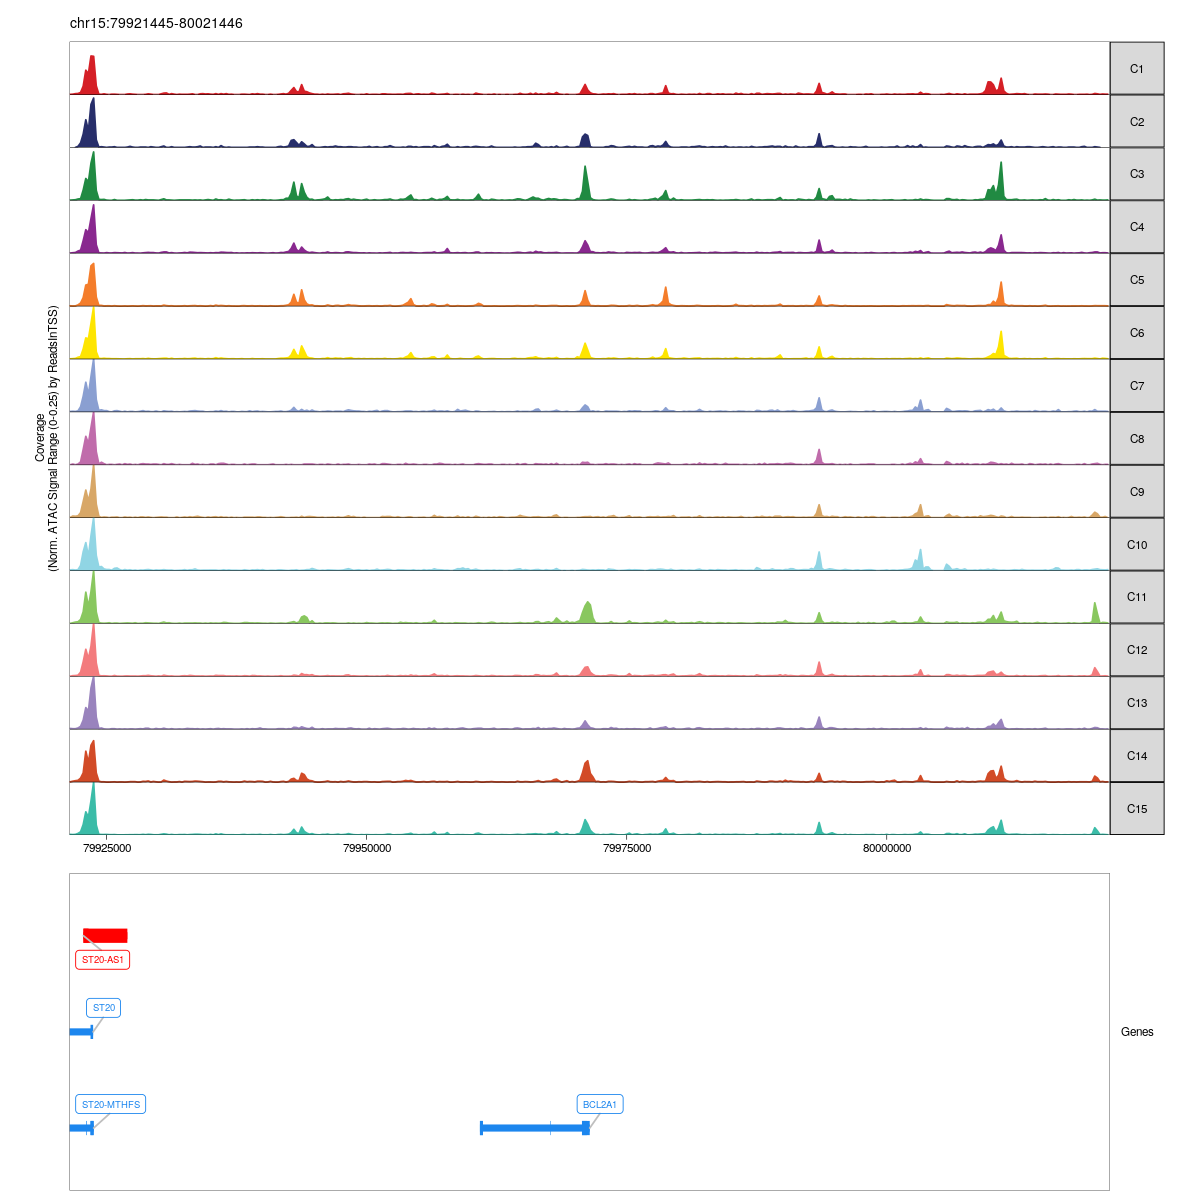

In [52]:
grid::grid.newpage()
grid::grid.draw(p$BCL2A1)

In [72]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                      ggrepel_0.8.2                    
 [3] patchwork_1.0.0                   gridExtra_2.3                    
 [5] uwot_0.1.8                        nabor_0.5.0                      
 [7] Seurat_3.1.5                      BSgen